<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Andrés Hernández Jiménez.

**Fecha:** 09 de Marzo del 2021.

**Expediente** : 717710 | 717895.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Rub27182n/Proyecto-SPF.git

# Proyecto TEMA-2

In [1]:
# <font color='midnightblue'>

# <font color='midnightblue'> 1. Análisis y Simulación de Videos de Youtube

> En este proyecto, examinaremos a detalle y simularemos las variables más escenciales de un video de YouTube: Likes, Dislikes, Comments y Views para obtener los estadísticos más probables de un hipotético video.

# <font color='midnightblue'> 2 . Objetivos

> ###  <font color='midnightblue'> Generales
>> Consideramos como objetivo principal, el generar un modelo/función que permita simular, a partir de parámetros o características clave de un video de YouTube, sus principales estádisticos.
    
> ###  <font color='midnightblue'> Específicos
>> - Encontrar las categorías de video más populares y etiquetarlas.
>> - Obtener la Función de Distribución de Probabilidad de cada estadístico para las categorías más populares.
>> - Simular cantidad de Likes, Dislikes, Comments y Views para las categorías más populares.
    



# <font color='midnightblue'> 3.  Definición del Problema
    
> En este proyecto queremos plantear la idea de una compañía que opera con Data Science,  y que a través de una base de datos de videos de YouTube, le es posible obtener distribuciones de probabilidad y simular casos específicos de hipotéticos videos, a los cuales se pretende estimar su recibimiento (número de vistas, likes, dislikes y comentarios) en la plataforma. 
    
> Todos los datos que se utilizarán son datos reales de videos en Youtube México y YouTube Estados Unidos. Con los 4 estadísticos previamente mencionados, se podrá obtener la información necesaria para evaluar las diferentes categorías de videos y su recibimiento en la plataforma a través de simulación Monte Carlo. Estos parámetros serán los nodos para trabajar específicamente y a través de estos se generarán datos que nos permiten cumplir con el objetivo central, examinar a detalle y simular las variables escenciales de un video de YouTube. 

# <font color='midnightblue'> 4. Nodos/Variables a Simular

> Los nodos/variables que elegimos son:
> - Número de Vistas
> - Cantidad de Likes
> - Cantidad de Dislikes
> - Número de Comentarios
> - Categoría de Videos

> Estos nodos fueron elegidos porque generamos la hipótesis de que intrínsecamente están correlacioandos y además se pueden simular ante el supuesto de un video ingresado en la red y su desempeño en la plataforma. La categoría de video es un filtro fundamental para poder separar los resultados de acuerdo con lo que la gente quiere ver basándonos en su popularidad actual. La ratio entre likes y dislikes nos darán una muy buena idea de cómo se desempeña el video una vez en la plataforma. El número de vistas y sus respectivos comentarios afirmarán si este video está volviéndose popular.

In [95]:
import pandas as pd
import numpy as np
from scipy.stats import beta
from scipy import optimize
from time import time
from collections import Counter
import scipy.stats as st
from fitter import Fitter
from CDIN import CDIN as eda
import statsmodels.api as sm 
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
pd.options.mode.chained_assignment = None  # default='warn'

In [96]:
mx = pd.read_csv('MXvideos.csv')
mx.shape

(40451, 16)

In [97]:
# ----------------------- Eliminar Columnas -----------------------
mx.drop(['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], inplace=True, axis=1)

In [98]:
# ----------------------- Aplicar EDA (Exporatory Data Analysis) -----------------------
eda.dqr(mx)

,Nombre,data_types,missing_values,present_values,unique_values,min,max
video_id,video_id,object,0,40451,33513,#NAME?,zzxLG6R5cHI
category_id,category_id,int64,0,40451,16,1,43
views,views,int64,0,40451,35915,157,100912384
likes,likes,int64,0,40451,14564,0,4470923
dislikes,dislikes,int64,0,40451,3693,0,1353667
comment_count,comment_count,int64,0,40451,6310,0,905925


In [99]:
# ----------------------- Mostrar Duplicados de 'video_id' -----------------------
print(mx[mx.duplicated(subset = ['video_id'])]) #mx[~] para mostrar opuesto

          video_id  category_id    views   likes  dislikes  comment_count
70          #NAME?           22    57070    6158       118            518
86          #NAME?           22     9409      24         2              3
219    _OXDcGPVAa4           26  1746221   93269      1792          10285
233    hcY52MFWMDM           25   263352     846       393            452
258         #NAME?           17   478507    1508       133            523
...            ...          ...      ...     ...       ...            ...
40419       #NAME?           24    13385     166         8             18
40420  WGOi_1XBclQ           10  4233617  436609     11240          56709
40426  TXTIMp7En-Q           25    78139    3118      1226           1896
40429  L6JFnZ5WabM           24   141734    5012       207           1294
40447  i7r_kMbyngk           25   121674    3558        58            491

[6938 rows x 6 columns]


In [100]:
# ----------------------- Crear df sin 'video_id' repetidos -----------------------
df = mx[~mx.duplicated(subset = ['video_id'])]

In [101]:
# ----------------------- Comprobar -----------------------
(df['video_id'].unique()).shape

(33513,)

In [102]:
# ----------------------- Eliminar Columnas con Valores = 0 -----------------------
index_names = df[(df['likes'] == 0) | (df['dislikes'] == 0 ) | (df['comment_count'] == 0 )].index

In [103]:
index_names

Int64Index([    7,    32,    88,    89,   120,   139,   146,   157,   184,
              188,
            ...
            40053, 40075, 40131, 40136, 40160, 40193, 40361, 40399, 40428,
            40433],
           dtype='int64', length=1548)

In [104]:
Counter(df['dislikes'] == 0)

Counter({False: 32621, True: 892})

In [105]:
# ----------------------- Tamaño Final del Dataset -----------------------
df.shape

(33513, 6)

## 1

In [111]:
#data = pd.read_csv('MXvideos.csv')
df['views']=np.log(df['views'])
df['views']=datax

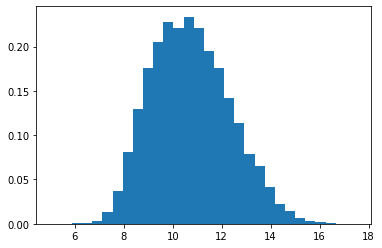

In [112]:
plt.hist(datax,30,density=True);

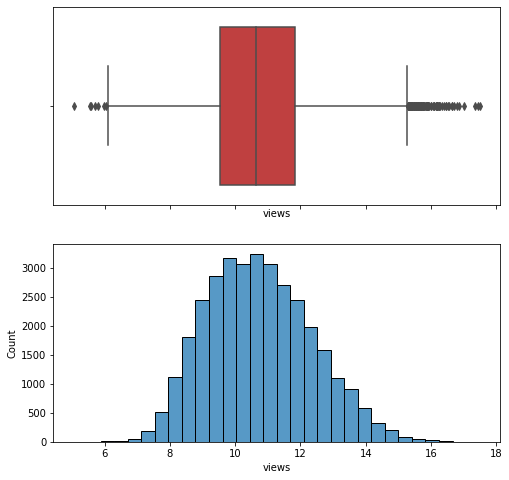

In [113]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(8,8))
sns.histplot(datax, ax=ax2, bins=30)
sns.boxplot(x=datax, ax=ax1, saturation=.5, color='r')

## Fin 1

## 6

## Utilizando scikit-learn

In [114]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    #score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [115]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.2222222222222222}


Text(0.5, 1.0, 'KDE using scikit-learn')

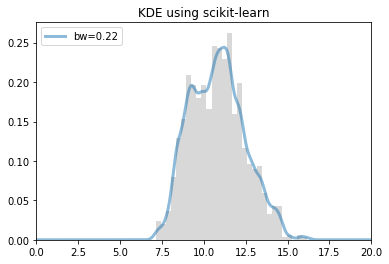

In [116]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using scikit-learn')

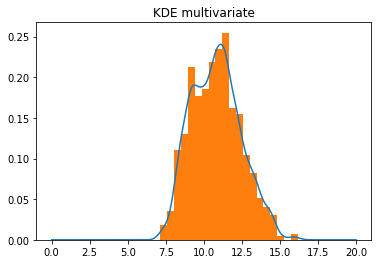

In [117]:
kde_multivariate=KDEMultivariate(data=x ,var_type='c', bw='cv_ml')
f_multi_kde= lambda x: kde_multivariate.pdf(x)
plt.plot(x_grid, f_multi_kde(x_grid))
plt.hist(x,bins=20, density=True)
plt.title('KDE multivariate')
plt.show()

In [118]:
f_multi_kde

<function __main__.<lambda>(x)>

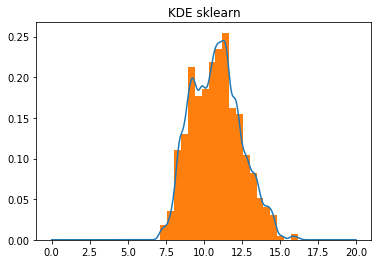

In [119]:
kde_sklearn= KernelDensity(kernel='gaussian', bandwidth=0.19).fit(x[:, np.newaxis])
f_skle= lambda x: np.exp(kde_sklearn.score_samples(x[:, None]))

plt.plot(x_grid, f_skle(x_grid))
plt.hist(x,bins=20, density=True)
plt.title('KDE sklearn')
plt.show()

In [63]:
f_skle

<function __main__.<lambda>(x)>

## Fin 6

## Utilizando Scipy

In [64]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [65]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


Text(0.5, 1.0, 'KDE using Scipy')

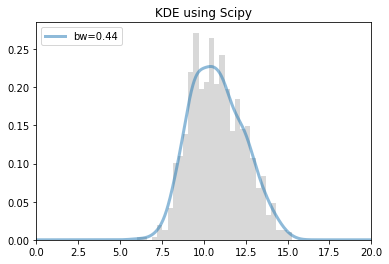

In [66]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Scipy')

## Utilizando Statsmodels Univariate

In [67]:
def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

In [68]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


Text(0.5, 1.0, 'KDE using Univariate Statmodel')

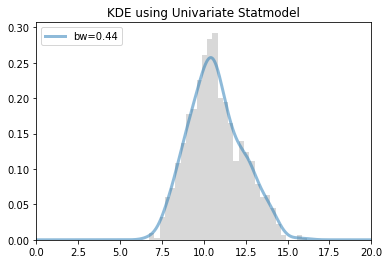

In [69]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Univariate Statmodel')

## Utilizando Statsmodels Multivariate

In [70]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)

In [71]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


Text(0.5, 1.0, 'KDE using Multivariate Statmodel')

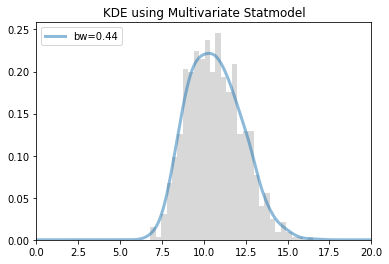

In [72]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Multivariate Statmodel')

## 2

## Ajuste a una distribución conocida

In [73]:
# -------------------- Distribuciones Seleccionadas Específicamente Para Este Nodo --------------------
dist_list = ['beta', 'burr12', 'chi', 'chi2', 'exponweib', 'gengamma', 'logistic', 'nakagami', 'nct', 'norm', 'pearson3']

In [74]:
# -------------------- Función Para Obtener Histograma junto con Distribuciones y su Respectivo Error --------------------
def distribuciones(dist_list, datax, bins):
    plt.figure(figsize = (16, 8))
    global err, x, y, J
    J=bins
    
    err = pd.DataFrame(index = dist_list, columns = ['error'])
    
    y, x,  _ = plt.hist(datax, bins = bins, density = True)
    x = x[1:]
    
    def ajuste_dist(dist):
        params = getattr(st, dist).fit(datax)
        y_hat = getattr(st, dist).pdf(x, *params)
        err.loc[dist] = ((y - y_hat)**2).mean()
        plt.plot(x, y_hat, label = dist);
    
    [ajuste_dist(dist) for dist in dist_list]
    
    plt.legend()
    plt.show()

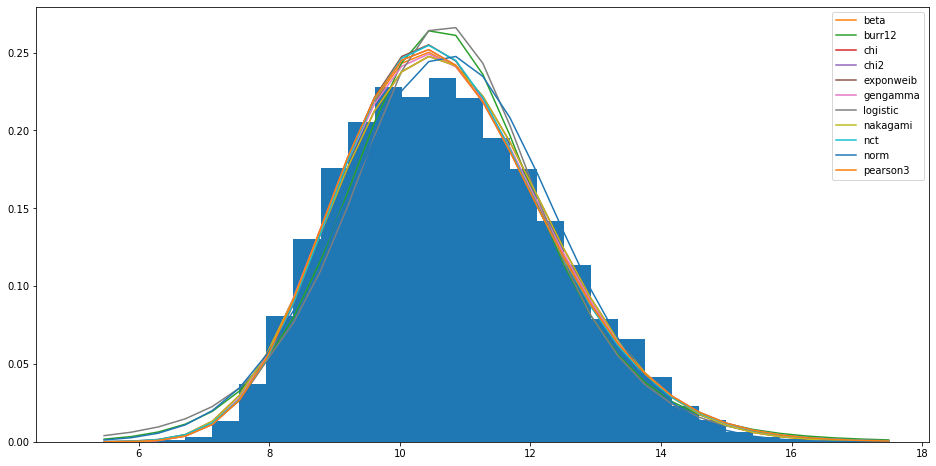

In [75]:
distribuciones(dist_list, datax,30)

In [76]:
# -------------------- Top 5 Distribuciones Para 'Views' --------------------
err.sort_values(by = 'error').head(5)

,error
chi,0.00012466
nakagami,0.00012466
gengamma,0.00014333
norm,0.000143415
beta,0.000154887


In [77]:
best = err.sort_values(by = 'error').head(5).index.values


## Fin 2

## 4

## Prueba Q-Q para la distribución Beta, Nodo 1

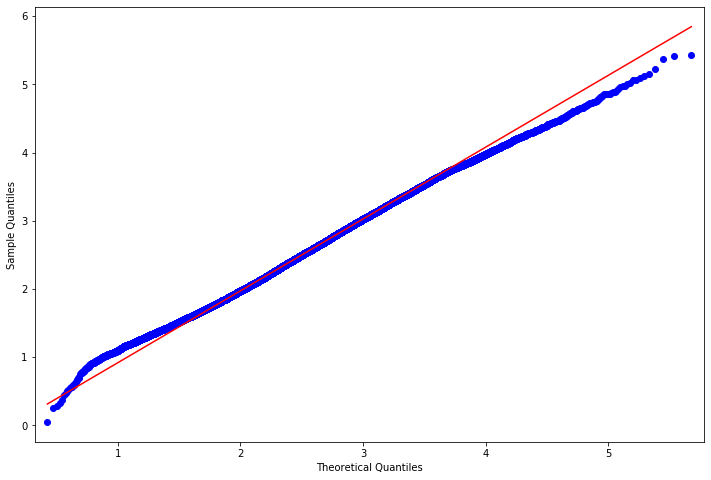

In [78]:
dist = best
fig, ax = plt.subplots(1,1, figsize = [12, 8])
g1 = sm.qqplot(datax, dist = getattr(st, best[0]), line = 'q', fit = True, ax = ax)

> Se puede apreciar una incongruencia en la prueba Q-Q en la parte derecha de la cola.

## Pruebas de Bondad y Ajuste

## <font color='midnightblue'> Prueba de la Chi Cuadrada $\chi^2$ Para la Distribución Beta

#### <font color='midnightblue'> Hipótesis Nula $H_0$:

<font color='midnightblue'> La distribución es Beta

#### <font color='midnightblue'> Hipótesis Alterna $H_a$:

<font color='midnightblue'> La distribución no es Beta

In [79]:
# Media y desviación estándar muestral
mu = np.mean(datax)
sigma = np.std(datax)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

media mu =10.733785, desviación estándar muestral =1.607015


In [81]:
param = getattr(st,'beta').fit(datax)
param

(14.544179380960998, 80.16906826946592, 4.030602392354277, 43.649807688368185)

In [82]:
pi = st.beta.pdf(x, *param)

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
#J= 30
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', Xs)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.90, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)
print('Media real: %f \nDesviación real muestral: %f'%(datax.mean(), datax.std()))

Valor de chi cuadrado teorico  =  21.29634148056783
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=21.29634148056783, pvalue=0.8481266986236682)
Estadístico de chi_cuadrado =  35.563171271923466
Media muestral =  10.73378479574969 
Desviación estándar muestral =  1.6070152003328422
Media real: 10.733785 
Desviación real muestral: 1.607039


#### <font color='midnightblue'> Conclusión Método Chi Cuadrada $\chi^2$:
> <font color='midnightblue'> Debido a ue el p-value es lo suficientemente grande este no se rechaza. Por lo tanto se acepta la $H_0$

## Fin 4

## 3

## Fitter

In [83]:
from fitter import Fitter as ft
def fitter(data: 'datos',
           dist: 'distribuciones',
           t: 'interrupción', 
           b: 'bins'):
    '''
    función para método fitter
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    t: tiempo hasta la interrupción de la prueba para la distribución en curso
    b: número de bins
    '''    
    global f
    f = ft(data, distributions = dist, timeout = t, bins = b)
    f.fit()

Wall time: 15.1 s


,sumsquare_error,aic,bic,kl_div
gengamma,0.002091,264.084851,-555926.760064,0.005053
beta,0.002165,258.574263,-554761.533123,0.005216
chi,0.002248,261.796723,-553517.577607,0.005516
nakagami,0.002248,261.797344,-553515.886793,0.005516
chi2,0.002466,251.369965,-550416.054157,0.006126


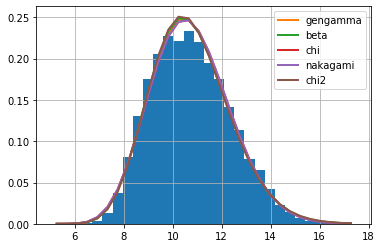

In [84]:
%%time
fitter(datax, dist_list, 15, 30)
f.summary()

#### <font color='midnightblue'> Conclusión Para Distribuciones con la Función y Método Fitter:
> Gracias a este metodo se puede comprobar el error en las distintas distribuciones de un metodo diferente, a diferencia de los otros metodos que también nos permiten ver esto de forma visual. En el caso del nodo para las "Views" apreciamos que las distribuciones $Gengamma, Beta$ y $Chi$ son las que mejor se ajustan y se mantienen constantes en ambos metodos a diferencias de distribuciones como la $Norm$ la cual con este metodo no tuvo lugar.  

## Fin 3

## 5

## Ajuste Kolmogorov-Smirnov

#### <font color='midnightblue'>Se fija un nivel de confianza del 99%. Por lo que el p-value siendo menor a 0.01 este ajuste no será apropiado.

#### <font color='midnightblue'> Hipótesis Nulas $H_0$:

In [85]:
h0 = ['$H_0$ = La PDF es {}'.format(dist) for dist in best]
h0

['$H_0$ = La PDF es chi',
 '$H_0$ = La PDF es nakagami',
 '$H_0$ = La PDF es gengamma',
 '$H_0$ = La PDF es norm',
 '$H_0$ = La PDF es beta']

#### <font color='midnightblue'> Hipótesis Alternas $H_a$:

In [86]:
ha = ['$H_a$ = La PDF no es {}'.format(dist) for dist in best]
ha

['$H_a$ = La PDF no es chi',
 '$H_a$ = La PDF no es nakagami',
 '$H_a$ = La PDF no es gengamma',
 '$H_a$ = La PDF no es norm',
 '$H_a$ = La PDF no es beta']

In [87]:
media, desviacion = st.norm.fit(datax)
d, pvalor = st.kstest(datax,"norm",args=(media,desviacion))

# queremos confianza al 99%
if pvalor < 0.01:
    print("No se ajusta a una normal")
else:
    print("Se puede ajustar a una normal")
pvalor
#El P value es demasiado pequeño por lo cual este ajuste puede no ser adecuado.

No se ajusta a una normal


1.4773017537268133e-31

In [88]:
def kol_smir_test(dist):   
    param = getattr(st, dist).fit(x)
    ks = st.kstest(x, dist, args=param)
    return dist, ks[0], ks[1]

In [89]:
top_kol_smir = [kol_smir_test(dist) for dist in best]
top_kol_smir.sort(key=lambda x:float(x[2]), reverse=True)
top_kol_smir

[('beta', 0.034560280144775024, 0.9999999999999852),
 ('norm', 0.07366544899615263, 0.996822140221474),
 ('nakagami', 0.09818965099488264, 0.9345310467982364),
 ('chi', 0.09819052126586159, 0.9345266769087579),
 ('gengamma', 0.10002159024583634, 0.9249687780401323)]

### <font color='midnightblue'> De acuerdo con el P-value siendo mayor al nivel de significancia se pueden aceptar las tres Hipótesis Nulas $H_0$ confirmando que la mejor distribución del nodo Views es en $beta$:

## Fin 5

## Metodos reducción de varianza

### Muestreo Estratificado

In [90]:
N = np.logspace(1,7,7,dtype=int)
B=N
def mues_est (B):
    u2= np.random.rand(B)
    i= np.arange(0,B)
    v=(u2+i)/B
    return v
ui_2= list(map(lambda x:mues_est(x),N))
f= [f_multi_kde(datax) for i in ui_2]

estrat=[f[i].mean() for i in range(len(f))]

In [91]:
mues_est(5)

array([0.18834488, 0.35963644, 0.47711699, 0.6408072 , 0.81805207])

In [92]:
f_multi_kde(datax)

array([0.11991806, 0.20646387, 0.18926605, ..., 0.19986848, 0.21225121,
       0.20418096])

## 7

## Metodo Aceptación Rechazo

In [93]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]            
    plt.show()
    
    x=[R1[i] for i in range(len(R1)) if condition[i]]

El máximo de f es: 0.22899403808542435


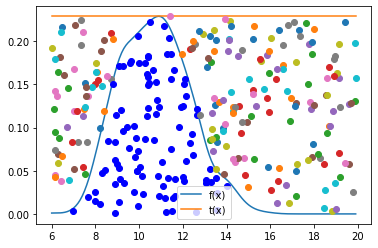

In [94]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
N=100
# Función objetivo 
f = f_multi_kde
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(6,20, 0.1)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 300 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(6,20, size=N)
Acep_rechazo(R2,R1, f,t)
# Prueba de función creada
#max_f=
#plt.hist(x_r,bins=50 density=True)

## Fin 7